# Best Neighborhood to Raise a Family of Children

With this project, we wanted to figure out which of the Pittsburgh neighborhoods can be considered the best to raise a family with children. When trying to figure this out, we thought about what we would want our children to have if we had any. We looked at a few different datasets such as Grocery stores and Parks, however we decided to analyze satisfaction, schools, and playgrounds.

## The Metrics:

#### Neighborhood Schools

This data set contains information about the different schools in each Neighborhoods. These include the amount of gifted students, the amount of other Individual Education Plans, the amount of non gifted or IEP students, and the total enrollment per neighborhood. 

To compare each neighborhood, I first executed the following code:

In [1]:
import pandas as pd

%matplotlib inline

school = pd.read_csv("neighborhood_iep (2).csv")
school['Ratios'] = school['gifted'].div(school['total_enrollment_k_12'])
school_new = school.set_index('neighborhoods')
school_new.sort_values("Ratios", ascending=False)

,gifted,other_iep,not_iep_or_gifted,total_enrollment_k_12,Ratios
neighborhoods,,,,,
Squirrel Hill North,108,20,200,328,0.329268
"Squirrel Hill South, Regent Square, Swisshelm Park",242,69,440,751,0.322237
Point Breeze,97,32,177,306,0.316993
Highland Park,83,45,254,382,0.217277
Greenfield,85,59,327,471,0.180467
"Bloomfield, Friendship",43,50,198,291,0.147766
Point Breeze North,19,23,87,129,0.147287
South Side Flats,15,24,70,109,0.137615
"Central, Upper Lawrenceville",32,49,154,235,0.136170


Using the code above, I created another column called Ratios. The ratio is the amount of gifted students divided by the total enrollment to find a percentage of gifted to total students. The data is then organized by the greatest to least ratios.

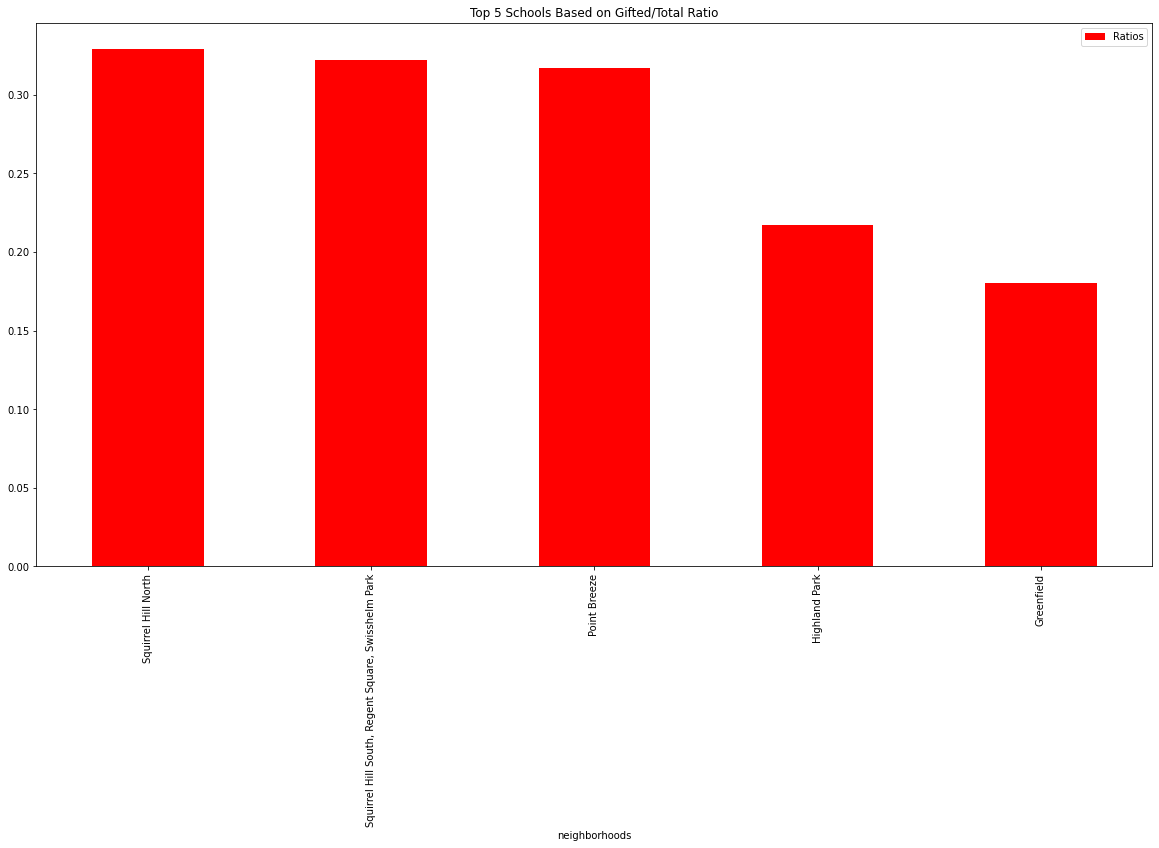

In [2]:
topFive = school_new.iloc[:, [4]].sort_values("Ratios", ascending=False).head(5)
topFive.plot(kind='bar', figsize = (20,10) ,title="Top 5 Schools Based on Gifted/Total Ratio",color="red")

Based on the data above, we can see that Squirrel Hill North, South, Regent square, Swisshelm park, and Point breeze all contain similar ratios. Meaning that all 3 neighborhoods are great options to send your children to school.

#### Playgrounds by Neighborhood

Data from: https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('playgrounds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          125 non-null    int64  
 1   name                        125 non-null    object 
 2   type                        0 non-null      float64
 3   maintenance_responsibility  120 non-null    object 
 4   park                        123 non-null    object 
 5   street                      123 non-null    object 
 6   image                       118 non-null    object 
 7   neighborhood                125 non-null    object 
 8   council_district            125 non-null    int64  
 9   ward                        125 non-null    int64  
 10  tract                       125 non-null    int64  
 11  public_works_division       125 non-null    int64  
 12  pli_division                125 non-null    int64  
 13  police_zone                 125 non

This is the information used to present the graph, For neighborhood there are 125 data points with information I used the sort_values method which is normally in ascending order, so I set ascending=False to reverse the order.

In [4]:
neighborhood_counts = df['neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.sort_values(ascending=False)
neighborhood_counts.head(15)

Squirrel Hill South    8
South Side Slopes      5
Beechview              5
Highland Park          4
Sheraden               4
Beltzhoover            4
Allegheny Center       4
Hazelwood              3
East Liberty           3
Upper Lawrenceville    3
Crawford-Roberts       3
South Oakland          3
Elliott                3
Mount Washington       3
Carrick                3
Name: neighborhood, dtype: int64

Here are the top 15 neighborhoods ranked by the amount of playgrounds per neighborhood, I used

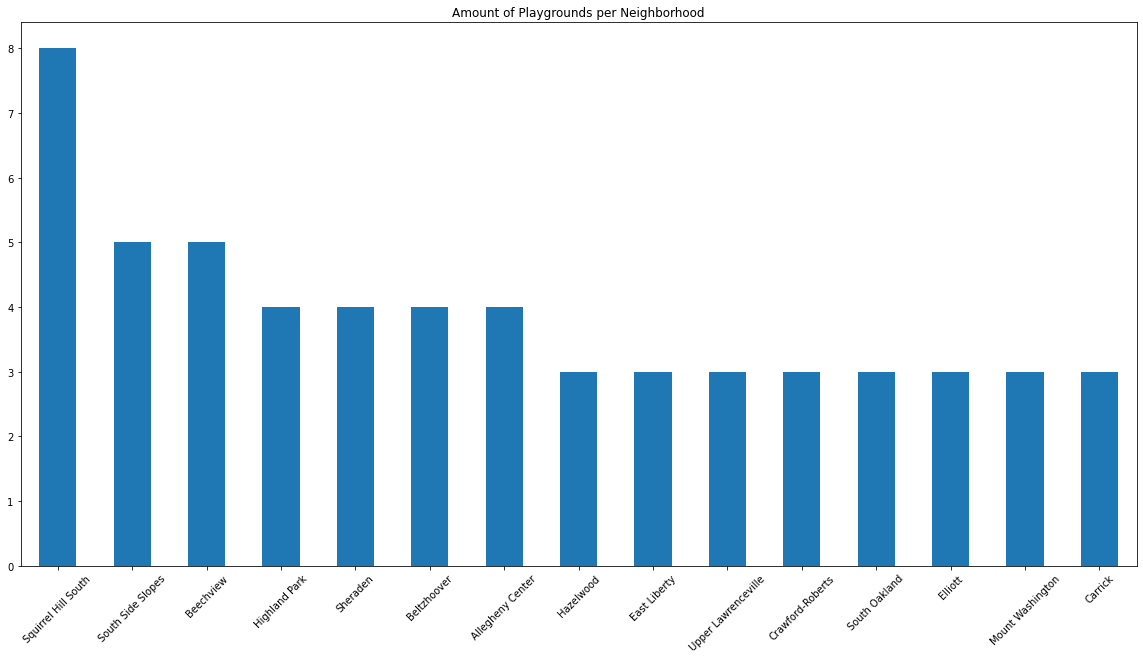

In [5]:
neighborhood_counts.head(15).plot.bar(x= 'neighborhoods',figsize = (20,10),rot=45 ,title = 'Amount of Playgrounds per Neighborhood')


This is the bar graph created to display the top 15 neighborhoods by amount of playgrounds in decending order

#### Satisfaction

In [1]:
#import everything needed
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

What was done was basically importing the dataset and using .describe() and other functions to see if it worked. After that I narrowed down the dataset with the columns and rows I wanted (the columns I wanted were categories for each neighborhood). I then got the top 5 neighborhoods of each category and made dataframes for each individual category, then for each category I plotted a bar graph which displayed the top 5 neighborhoods with the highest satisfaction in their specified category. The categories were: public transportation, street maintenance, schools, parks.

In [2]:
#import the dataset from a csv file
neighSat = pd.read_csv("neigborhoodSatisfaction.csv")

#test to see if it worked
#neighSat[['parks_satisfied', 'schools_satisfied','street_maintenance_satisfied','public_transportation_satisfied','fire_department_satisfied','sewage_system_satisfied','condition_cost_housing_satisfied']]

#get all the rows and the specified columns from the dataset
neighSat.loc[:,['neighborhood','parks_satisfied', 'schools_satisfied','street_maintenance_satisfied','public_transportation_satisfied','fire_department_satisfied','sewage_system_satisfied','condition_cost_housing_satisfied'] ]

#make a new frame that just contains the ^^above^^ query
newNeigh = neighSat.loc[:,['neighborhood','parks_satisfied', 'schools_satisfied','street_maintenance_satisfied','public_transportation_satisfied','fire_department_satisfied','sewage_system_satisfied','condition_cost_housing_satisfied'] ]

#make new dataframes that select the top 5 for each category
parkS = newNeigh.nlargest(5,'parks_satisfied')
schoolS = newNeigh.nlargest(5,'schools_satisfied')
streetS = newNeigh.nlargest(5,'street_maintenance_satisfied')
transportS = newNeigh.nlargest(5,'public_transportation_satisfied')

#make new dfs that narrow down the data 
parkH = parkS.loc[:,['neighborhood','parks_satisfied']]
schoolH = schoolS.loc[:,['neighborhood','schools_satisfied']]
streetH = streetS.loc[:,['neighborhood','street_maintenance_satisfied']]
transportH = transportS.loc[:,['neighborhood','public_transportation_satisfied']]

###
###
###
###make new data frames from the dataframes that narrowd the data down

#transportB
transportB = pd.DataFrame(
    {"public_transportation_satisfied": [100, 91, 90, 88, 85]}, 
    index=["North Side", "Esplen", "Oakwood", "Allegheny Center", "Regent Square"])

#streetB
streetB = pd.DataFrame(
    {"street_maintenance_satisfied": [59, 57,56,54,51]}, 
    index=["Bon Air", "Morningside", "Stanton Heights", "Northview Heights", "Allegheny Center"])

#schoolB
schoolB = pd.DataFrame(
    {"schools_satisfied": [80, 70,66,64,62]}, 
    index=["North Side", "Duquesne Heights", "Greenfield", "Mt Oliver", "Morningside"])

#parkB
parkB = pd.DataFrame(
    {"parks_satisfied": [85, 80,76,73,73]}, 
    index=["Highland Park", "Squirrel Hill", "Greenfield", "Allegheny West", "Regent Square"])

KeyError: "None of [Index(['neighborhood', 'parks_satisfied', 'schools_satisfied',\n       'street_maintenance_satisfied', 'public_transportation_satisfied',\n       'fire_department_satisfied', 'sewage_system_satisfied',\n       'condition_cost_housing_satisfied'],\n      dtype='object')] are in the [columns]"

In [3]:
#plots the % of people satisfied with their neighborhoods public transportation service
transportB.plot.bar(color='PURPLE',ylabel='% participants satisfied')

NameError: name 'transportB' is not defined

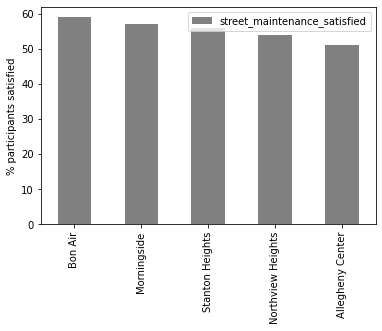

In [9]:
#plots the % of people satisfied with their neighborhoods street maintenance
streetB.plot.bar(color="GRAY",ylabel='% participants satisfied')

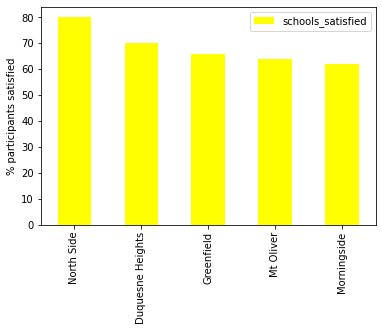

In [10]:
#plots the % of people satisfied with their neighborhoods schools
schoolB.plot.bar(color = "YELLOW",ylabel='% participants satisfied')

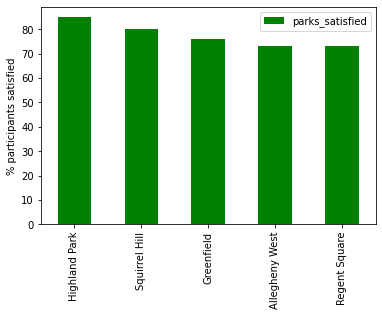

In [11]:
#plots the % of people satisfied with their neighborhoods parks
parkB.plot.bar(color = "GREEN",ylabel='% participants satisfied')

Results:

**Greenfield** appears twice for *parks satisfied* and *schools satisfied*


**Regent Square** appears twice in *parks satisfied* and *public transportation satisfied*


**Allegheny Center** appears twice in *street maintenance satisfaction* and *public transporation satisfaction*


**North Side** is a the top of *public transportation satisfaction* and *schools satisfied*


### The Best Neighborhood

Based on the data we presented above, we have determined the best neighborhood to raise a family in is Regent Square in Squirrel Hill South. The neighborhood has 32% of their students being gifted, 8 playgrounds, and appeared twice in parks satisfied and public transportation satisfied. 
Our best neighborhood conclusion matches with our personal favorite neighborhood, which is Squirrel Hill South.

## Thank you! Any Questions?